In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Just for aesthetic purposes for our graphs. 

In [2]:
df = pd.read_csv("C:\\Users\\win10\\Desktop\\fifa_eda.csv")
df.head() 


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
df.tail() 


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.0


In [4]:
df.isnull().sum() 


ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [5]:
df1 = df.dropna(subset = ["Club",'Value','International Reputation','Skill Moves','Contract Valid Until'])


In [6]:
df1.isnull().sum() 


ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [18]:
df.shape 


(18207, 18)

In [19]:
df1.shape

(17907, 18)

In [8]:
ab = (df.shape,df1.shape) 
ab


((18207, 18), (17907, 18))

In [9]:
for f in df.columns:
    print(f,df1[f].nunique())

ID 17907
Name 16913
Age 28
Nationality 163
Overall 48
Potential 47
Club 651
Value 216
Wage 143
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 21
Weight 57
Release Clause 1245


In [21]:
dups=df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Length: 18207, dtype: bool

In [22]:
dups.sum()

NameError: name 'dups' is not defined

25.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

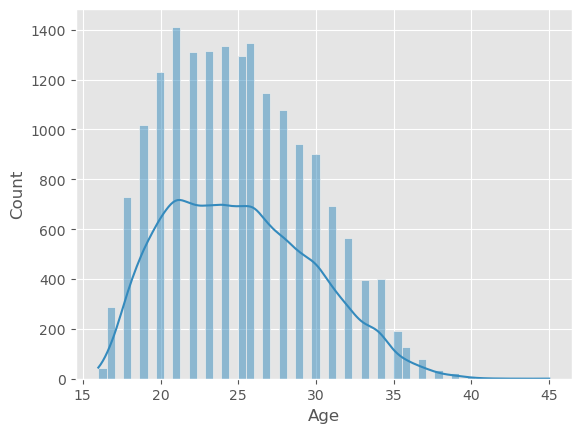

In [10]:
print(df1["Age"].median())
sns.histplot(df1.Age,kde='True')

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

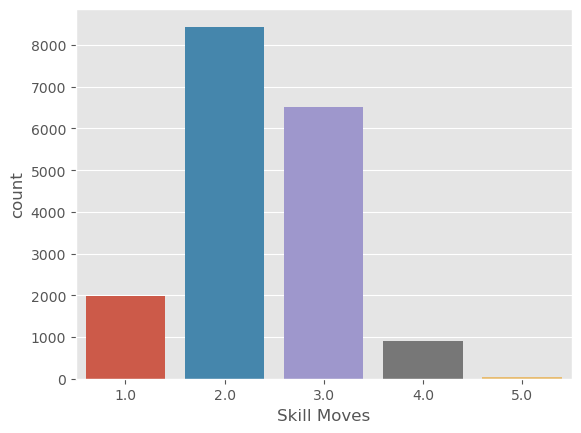

In [17]:
sns.countplot(x='Skill Moves',data=df1)


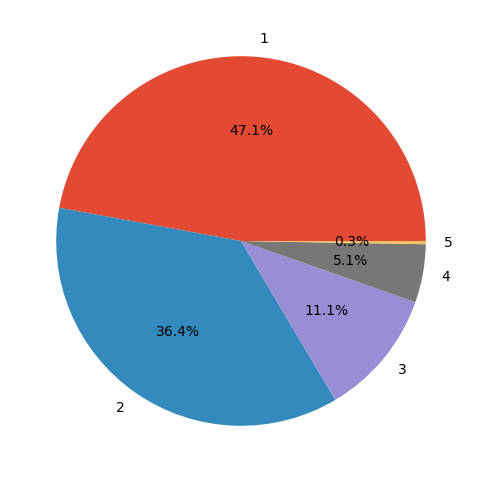

In [22]:
plt.subplots(figsize=(7,6))
plt.pie(df1["Skill Moves"].value_counts(),labels=["1","2","3","4","5"],autopct='%1.1f%%')
plt.show()

In [15]:
df1['Nationality'].value_counts()


England      1655
Germany      1195
Spain        1071
Argentina     935
France        910
             ... 
Guam            1
Fiji            1
Liberia         1
Mauritius       1
Botswana        1
Name: Nationality, Length: 163, dtype: int64

Text(0, 0.5, 'Count')

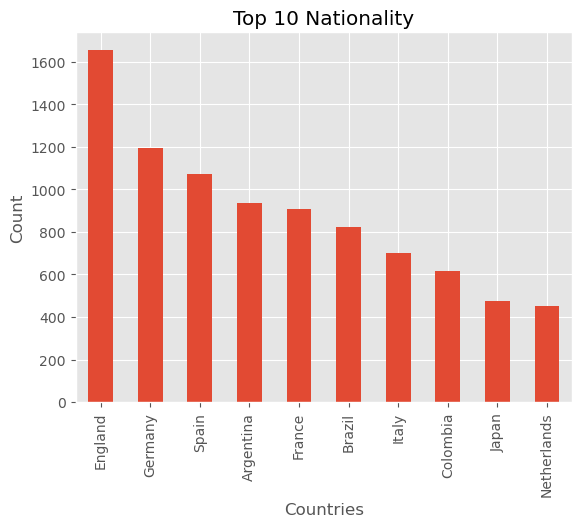

In [16]:
ax = df1['Nationality'].value_counts() \
.head(10) \
.plot(kind='bar',title='Top 10 Nationality')
ax.set_xlabel("Countries")
ax.set_ylabel("Count")

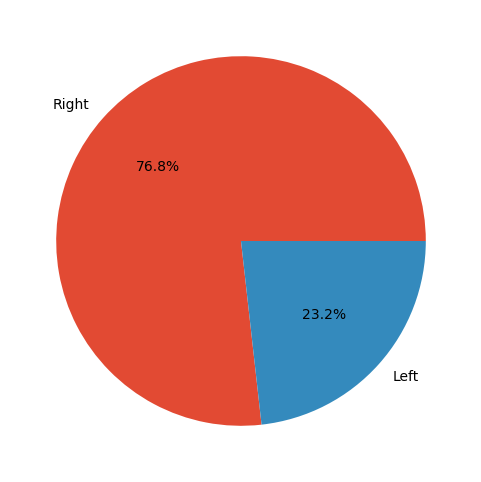

In [25]:
plt.subplots(figsize=(7,6))
plt.pie(df1["Preferred Foot"].value_counts(),labels=["Right","Left"],autopct='%1.1f%%')
plt.show()

In [17]:
df_corr = df1[['Overall','Value','Wage']].corr()
df_corr

,Overall,Value,Wage
Overall,1.000000,0.631673,0.576098
Value,0.631673,1.000000,0.858037
Wage,0.576098,0.858037,1.000000


<AxesSubplot:>

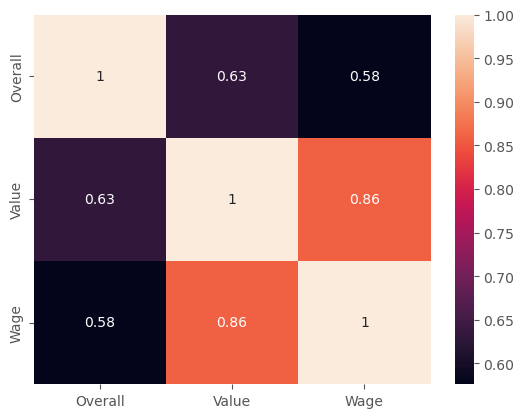

In [18]:
sns.heatmap(df_corr,annot=True)

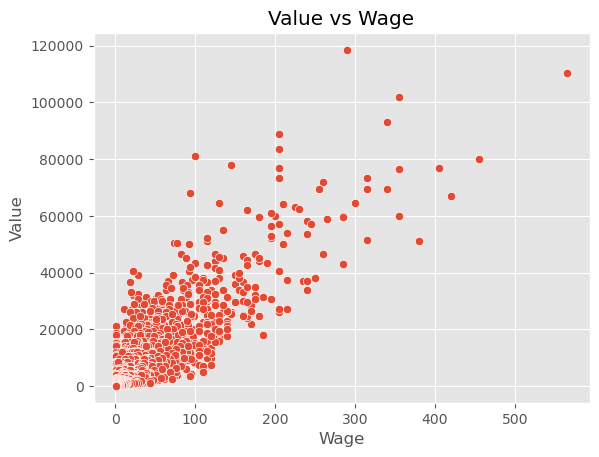

In [19]:
ax = sns.scatterplot(x='Wage',
               y="Value",
              data=df1)
ax.set_title("Value vs Wage")
plt.show()

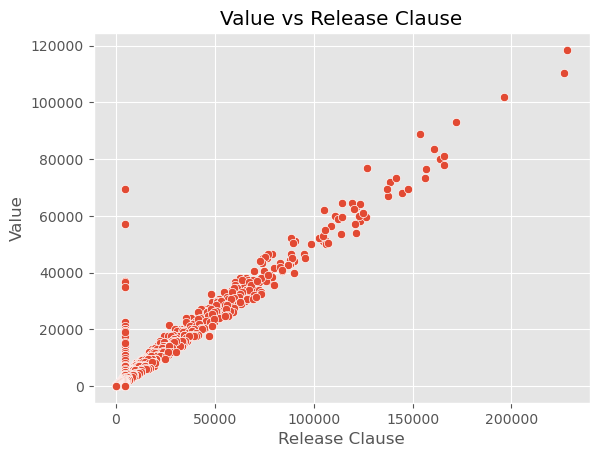

In [23]:
ax = sns.scatterplot(x='Release Clause',
               y="Value",
              data=df1)
ax.set_title("Value vs Release Clause")
plt.show()

In [25]:
correlation_matrix = df1.corr()
wage_correlation = correlation_matrix['Wage'].drop('Wage')  # Drop the 'Wage' column itself

print(wage_correlation)



ID                         -0.206751
Age                         0.145075
Overall                     0.576098
Potential                   0.489289
Value                       0.858037
International Reputation    0.671543
Skill Moves                 0.264310
Joined                     -0.144842
Height                      0.019940
Weight                      0.065684
Release Clause              0.829438
Name: Wage, dtype: float64


# Thank You